<a href="https://colab.research.google.com/github/Shrawanthi06/Bioinformatics-Dashboard/blob/main/ProteinSequenceAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython matplotlib pandas seaborn -q
print("✅ Packages installed successfully!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.6 MB/s eta 0:00:00
✅ Packages installed successfully!


In [ ]:
from google.colab import files

# This creates a file upload button:
print("Upload your FASTA file below:")
uploaded = files.upload()

# Verify upload
if not uploaded:
    print(" No file uploaded! Run this cell again.")
else:
    filename = list(uploaded.keys())[0]
    print(f"\n File '{filename}' uploaded successfully!")


Upload your FASTA file below:


Saving Hemoglobin.fasta to Hemoglobin.fasta

 File 'Hemoglobin.fasta' uploaded successfully!


In [ ]:
from Bio import SeqIO
from collections import Counter
from io import StringIO

def process_fasta(uploaded_file):
    """Processes uploaded FASTA content"""
    sequences = []
    fasta_content = uploaded_file.decode('utf-8')

    for record in SeqIO.parse(StringIO(fasta_content), "fasta"):
        sequences.append({
            'id': record.id,
            'description': record.description,
            'sequence': str(record.seq),
            'length': len(record.seq)
        })
    return sequences

# Process your file:
sequences = process_fasta(uploaded[filename])

# Show summary:
print(f"\n Found {len(sequences)} sequence(s):")
for seq in sequences:
    print(f"\n> {seq['description']}")
    print(f"Length: {seq['length']} amino acids")
    print(f"First 10 residues: {seq['sequence'][:10]}...")



 Found 2 sequence(s):

> 4HHB_1|Chains A, C|Hemoglobin subunit alpha|Homo sapiens (9606)
Length: 141 amino acids
First 10 residues: VLSPADKTNV...

> 4HHB_2|Chains B, D|Hemoglobin subunit beta|Homo sapiens (9606)
Length: 146 amino acids
First 10 residues: VHLTPEEKSA...


In [ ]:
def analyze_amino_acids(sequences):
    """Calculates amino acid frequencies"""
    total_length = 0
    aa_counts = Counter()

    for seq in sequences:
        total_length += seq['length']
        aa_counts.update(seq['sequence'])

    return total_length, aa_counts

# Run analysis:
total_length, aa_counts = analyze_amino_acids(sequences)

# Display top 5 most frequent:
print(f"\n Top 5 Amino Acids:")
for aa, count in aa_counts.most_common(5):
    print(f"{aa}: {count} ({count/total_length:.1%})")



 Top 5 Amino Acids:
L: 36 (12.5%)
A: 36 (12.5%)
V: 31 (10.8%)
K: 22 (7.7%)
G: 20 (7.0%)


/tmp/ipython-input-126079090.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AminoAcid', y='Count', palette='viridis')


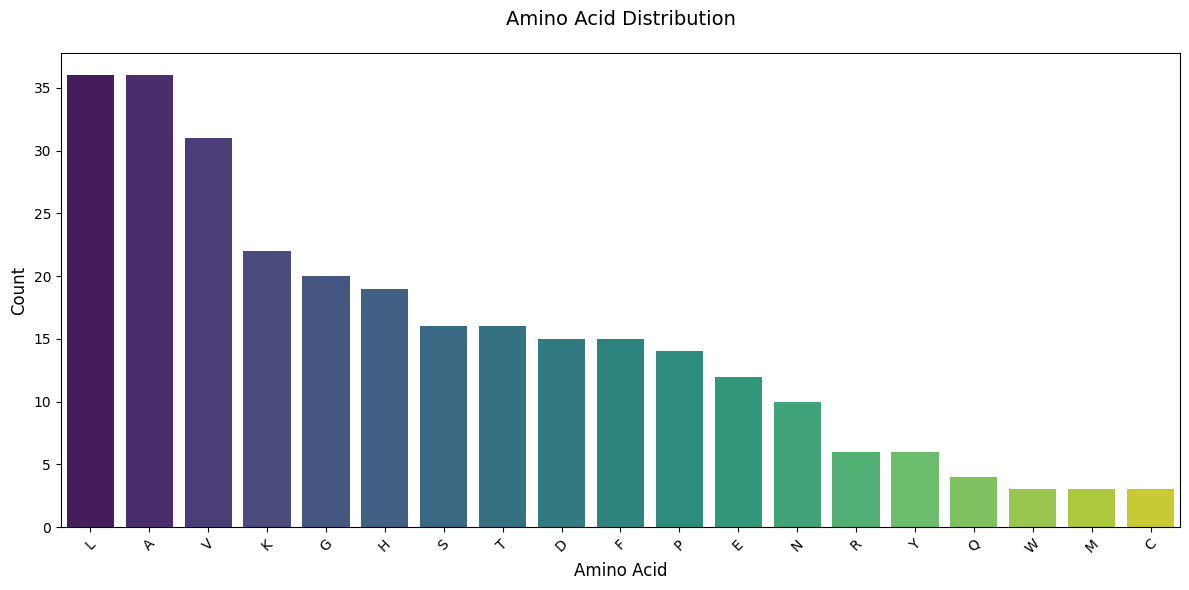

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
df = pd.DataFrame({
    'AminoAcid': list(aa_counts.keys()),
    'Count': list(aa_counts.values())
}).sort_values('Count', ascending=False)

# Create plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='AminoAcid', y='Count', palette='viridis')
plt.title('Amino Acid Distribution', fontsize=14, pad=20)
plt.xlabel('Amino Acid', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


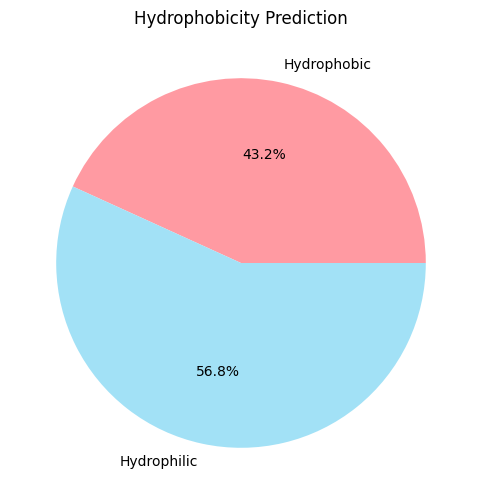


 Prediction: This protein is predominantly Hydrophilic


In [ ]:
def predict_hydrophobicity(aa_counts):
    hydrophobic = {'A', 'I', 'L', 'M', 'F', 'W', 'V'}
    hydrophilic = {'R', 'K', 'D', 'E', 'Q', 'N', 'H', 'S', 'T', 'Y'}

    hydro_count = sum(count for aa, count in aa_counts.items() if aa in hydrophobic)
    total = sum(aa_counts.values())
    ratio = hydro_count/total

    # Visualization
    plt.figure(figsize=(6, 6))
    plt.pie([ratio, 1-ratio],
            labels=['Hydrophobic', 'Hydrophilic'],
            colors=['#FF9AA2', '#A2E1F6'],
            autopct='%1.1f%%')
    plt.title('Hydrophobicity Prediction')
    plt.show()

    return "Hydrophobic" if ratio > 0.5 else "Hydrophilic"

# Run prediction:
prediction = predict_hydrophobicity(aa_counts)
print(f"\n Prediction: This protein is predominantly {prediction}")


In [ ]:
# Export to CSV
df.to_csv('amino_acid_counts.csv', index=False)

# Download the results
from google.colab import files
files.download('amino_acid_counts.csv')
print("\n CSV file downloaded!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 CSV file downloaded!
